<a href="https://www.kaggle.com/code/prasadposture121/financial-distress-prediction?scriptVersionId=116961198" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Financial Distress Prediction

Let's install and import some required libraries before we begin.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
pip install opendatasets

Note: you may need to restart the kernel to use updated packages.


In [4]:
#importing dependencies
import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import os
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [5]:
import opendatasets as od
od.download('https://www.kaggle.com/c/GiveMeSomeCredit')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  prasadposture121


Your Kaggle Key:

  ································


100%|██████████| 5.16M/5.16M [00:00<00:00, 60.6MB/s]


Extracting archive ./GiveMeSomeCredit/GiveMeSomeCredit.zip to ./GiveMeSomeCredit


In [6]:
os.listdir('GiveMeSomeCredit')

['Data Dictionary.xls', 'cs-test.csv', 'sampleEntry.csv', 'cs-training.csv']

In [58]:
train_df = pd.read_csv('./GiveMeSomeCredit/cs-training.csv')
print(train_df.shape)
train_df.head()

(150000, 12)


,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [59]:
test_df = pd.read_csv('./GiveMeSomeCredit/cs-test.csv')
print(test_df.shape)
test_df.head()

(101503, 12)


,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [60]:
submission =  pd.read_csv('./GiveMeSomeCredit/sampleEntry.csv')
submission.head()

,Id,Probability
0,1,0.080807
1,2,0.040719
2,3,0.011968
3,4,0.067640
4,5,0.108264


In [61]:
train_df['SeriousDlqin2yrs'].unique()

array([1, 0])

See that the predictions are in the form of binary numbers 0 for `No` and 1 for `Yes`

In [62]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [63]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101503 entries, 0 to 101502
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            101503 non-null  int64  
 1   SeriousDlqin2yrs                      0 non-null       float64
 2   RevolvingUtilizationOfUnsecuredLines  101503 non-null  float64
 3   age                                   101503 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  101503 non-null  int64  
 5   DebtRatio                             101503 non-null  float64
 6   MonthlyIncome                         81400 non-null   float64
 7   NumberOfOpenCreditLinesAndLoans       101503 non-null  int64  
 8   NumberOfTimes90DaysLate               101503 non-null  int64  
 9   NumberRealEstateLoansOrLines          101503 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  101503 non-null  int64  
 11  

## Exploratory Data Analysis

In [79]:
Atttributes= ['RevolvingUtilizationOfUnsecuredLines', 'age',
              'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
              'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
              'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
              'NumberOfDependents']

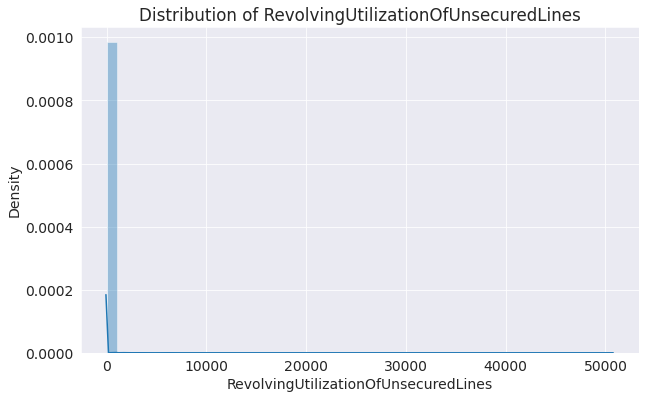

/n


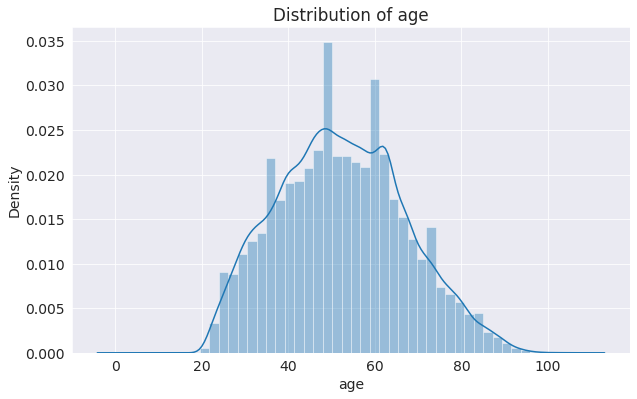

/n


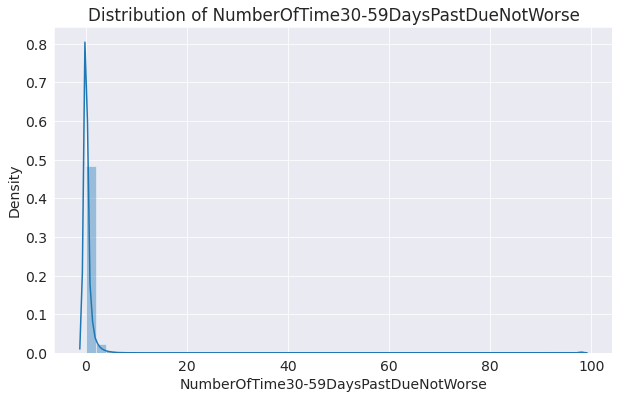

/n


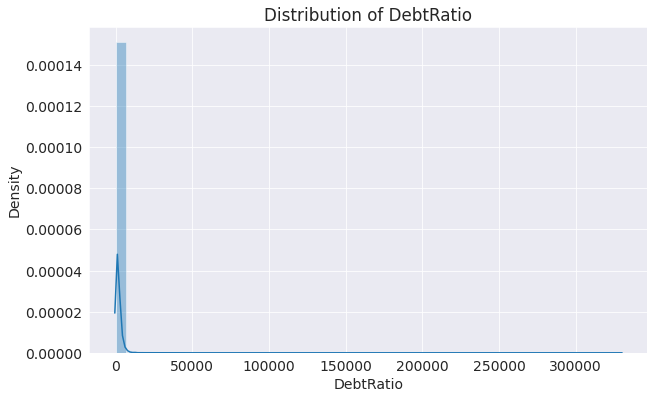

/n


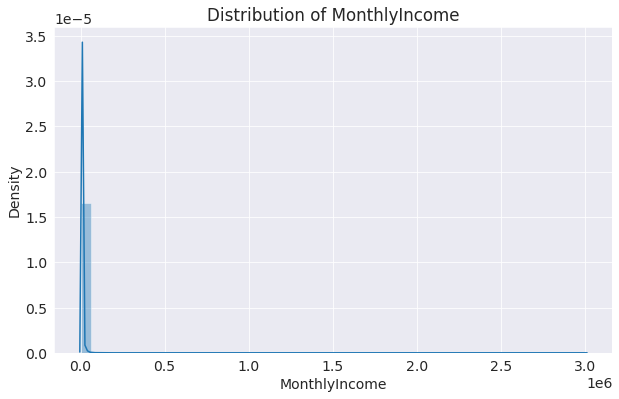

/n


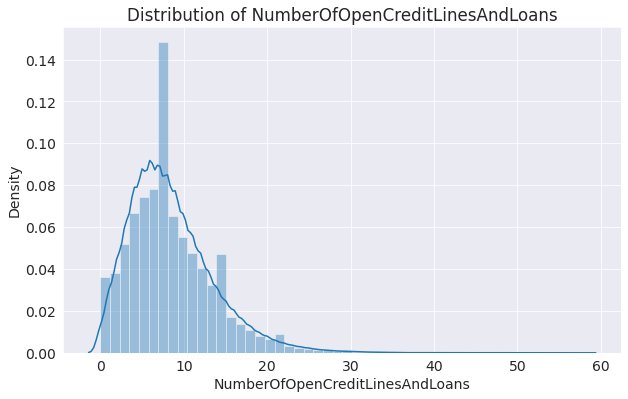

/n


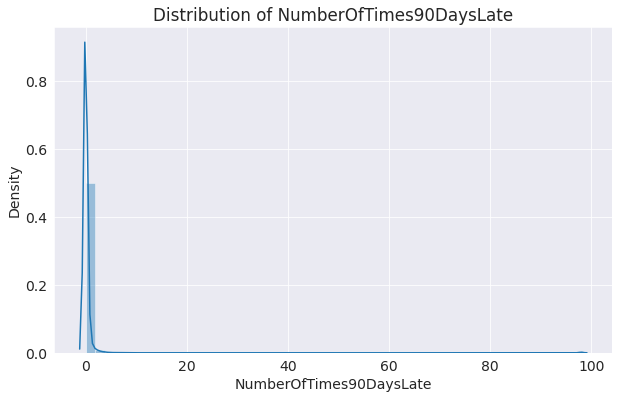

/n


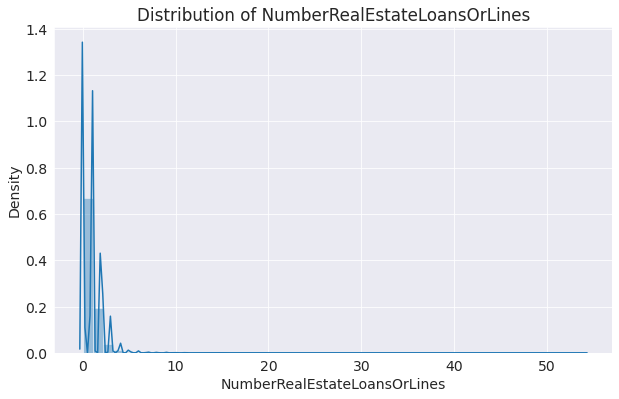

/n


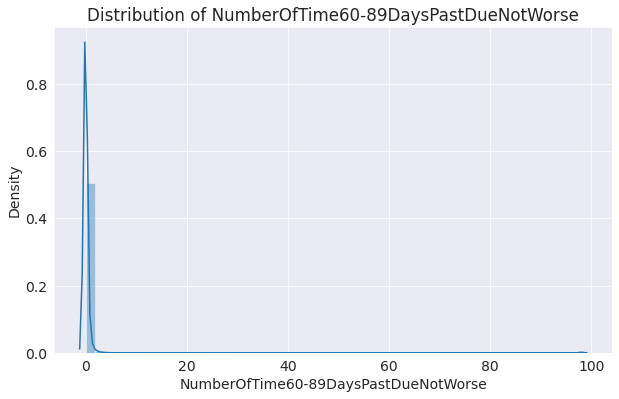

/n


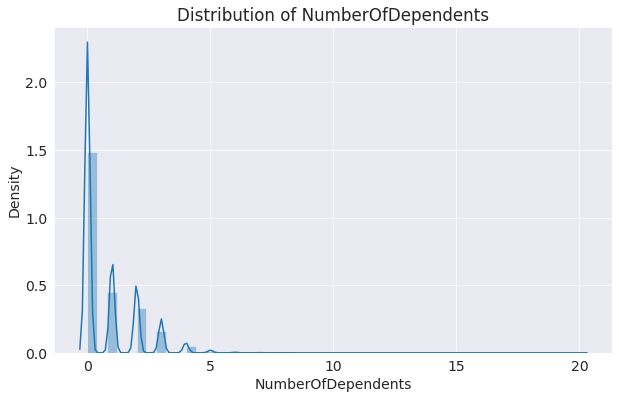

/n


In [80]:
for i in Atttributes:
    sns.distplot(train_df[i])
    plt.title('Distribution of '+i)
    plt.show()
    print('/n')

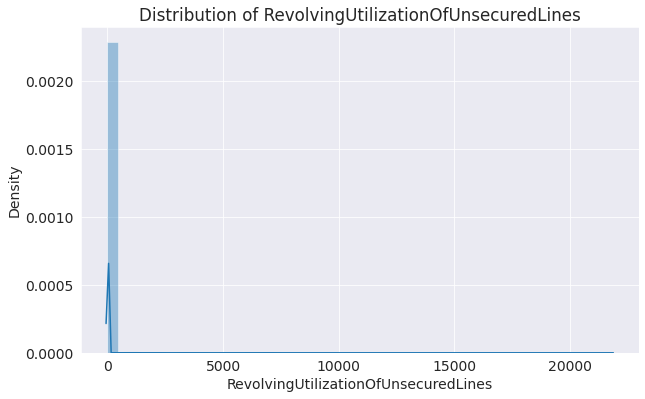

/n


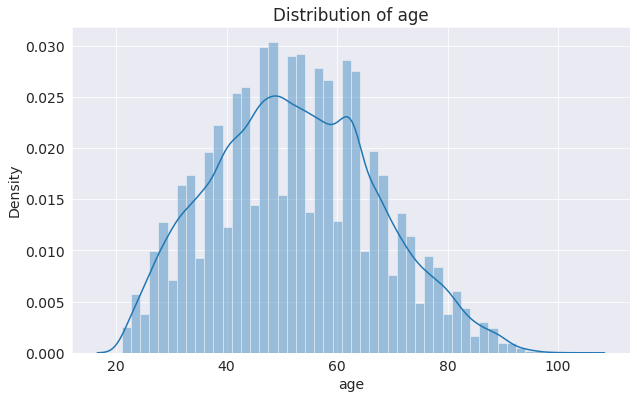

/n


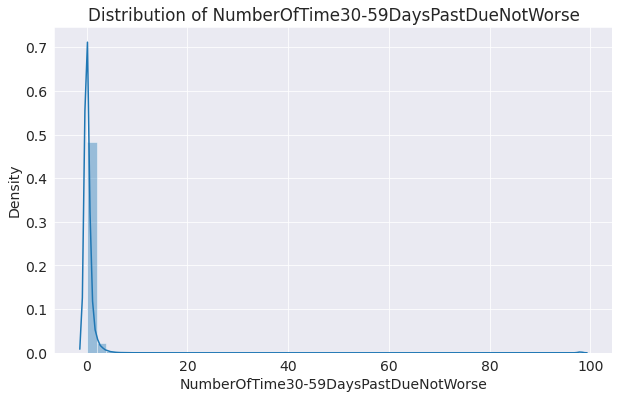

/n


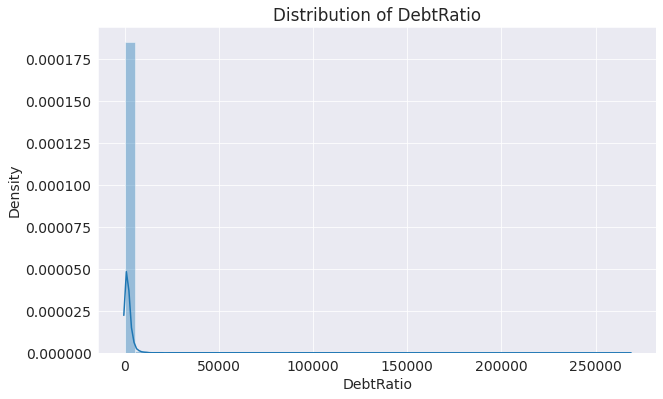

/n


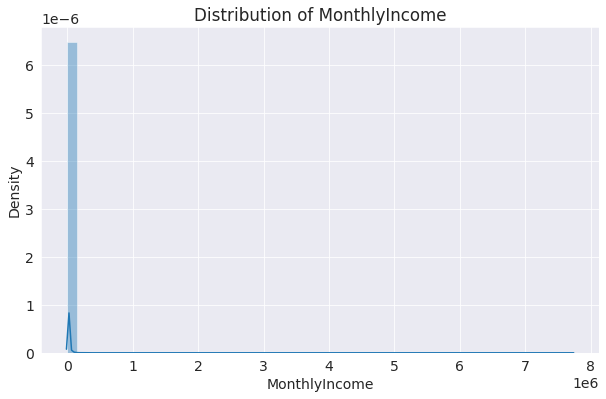

/n


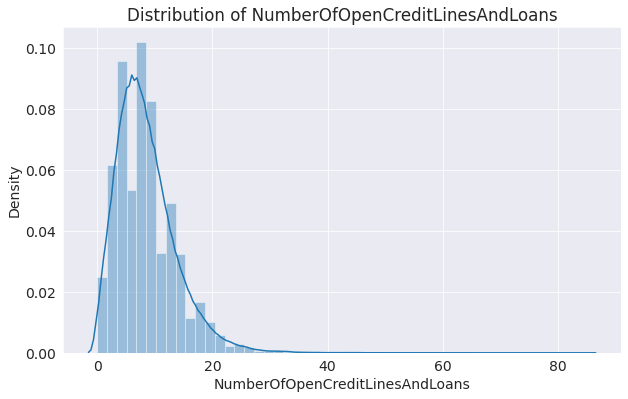

/n


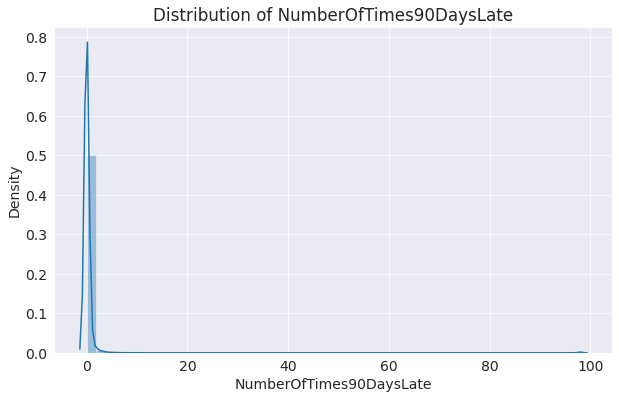

/n


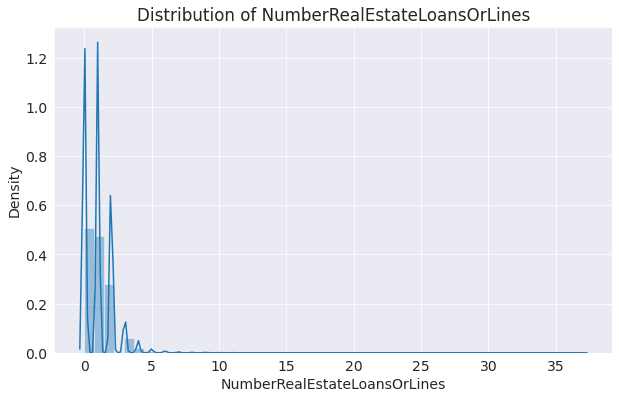

/n


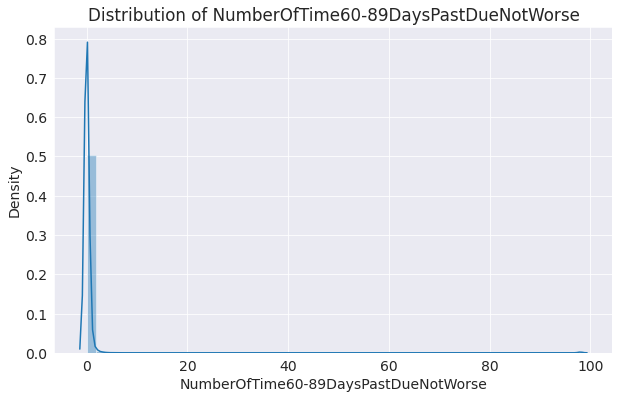

/n


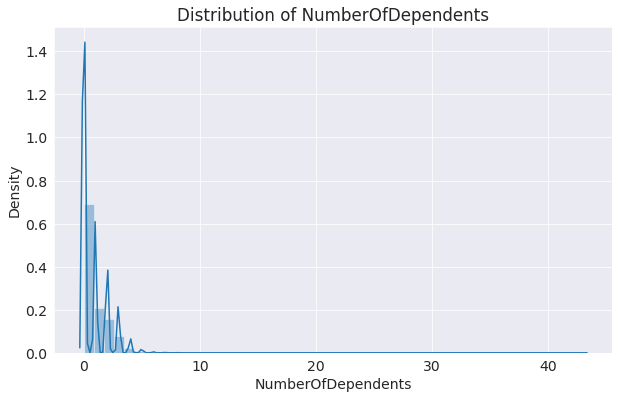

/n


In [81]:
for i in Atttributes:
    sns.distplot(test_df[i])
    plt.title('Distribution of '+i)
    plt.show()
    print('/n')

There are lot of outliers in the test and the train data. We need to take care of them properly so that they don't trouble us after scaling the data. For that we will substitute the outliers with value which comes under two times stadard deviation. We choosing two times standard deviation since it covers 95% of the part of the distribution.


In [87]:
def normalizer(x,df):
    upper_boundary=df[x].mean()+3*df[x].std()
    lower_boundary=df[x].mean()-3*df[x].std()
    max_att=df[x].max()
    min_att=df[x].min()
    return {'Attribute':x, 'upper_boundary': upper_boundary, 'lower_boundary': lower_boundary, 
           'max_att':max_att, 'min_att':min_att }

In [88]:
train_limits = pd.DataFrame([normalizer(x, train_df) for x in Atttributes])
train_limits

,Attribute,upper_boundary,lower_boundary,max_att,min_att
0,RevolvingUtilizationOfUnsecuredLines,755.314550,-743.217674,50708.0,0.0
1,age,96.610804,7.979609,109.0,0.0
2,NumberOfTime30-59DaysPastDueNotWorse,12.999377,-12.157310,98.0,0.0
3,DebtRatio,6466.460645,-5760.450494,329664.0,0.0
4,MonthlyIncome,49824.243883,-36483.801408,3008750.0,0.0
5,NumberOfOpenCreditLinesAndLoans,23.890613,-6.985093,58.0,0.0
6,NumberOfTimes90DaysLate,12.773885,-12.241938,98.0,0.0
7,NumberRealEstateLoansOrLines,4.407553,-2.371073,54.0,0.0
8,NumberOfTime60-89DaysPastDueNotWorse,12.705925,-12.225152,98.0,0.0
9,NumberOfDependents,4.102480,-2.588036,20.0,0.0


In [89]:
test_limits = pd.DataFrame([normalizer(x, test_df) for x in Atttributes])
test_limits

,Attribute,upper_boundary,lower_boundary,max_att,min_att
0,RevolvingUtilizationOfUnsecuredLines,593.778116,-583.158116,21821.0,0.0
1,age,96.744705,8.066168,104.0,21.0
2,NumberOfTime30-59DaysPastDueNotWorse,14.069232,-13.161692,98.0,0.0
3,DebtRatio,5242.260714,-4553.310673,268326.0,0.0
4,MonthlyIncome,116380.836713,-102670.765534,7727000.0,0.0
5,NumberOfOpenCreditLinesAndLoans,23.885815,-6.978787,85.0,0.0
6,NumberOfTimes90DaysLate,13.844267,-13.250885,98.0,0.0
7,NumberRealEstateLoansOrLines,4.343833,-2.317686,37.0,0.0
8,NumberOfTime60-89DaysPastDueNotWorse,13.781050,-13.240416,98.0,0.0
9,NumberOfDependents,4.179381,-2.641288,43.0,0.0


### Input and Target Columns

Let's identify the input and target columns.

In [31]:
train_df.columns

Index(['Unnamed: 0', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [32]:
input_cols = ['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents']
target_col = 'SeriousDlqin2yrs'

In [33]:
inputs = train_df[input_cols].copy()
targets = train_df[target_col].copy()

In [34]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

Only numeric columns are present.

### Imputing missing numeric values

In [39]:
from sklearn.impute import SimpleImputer

In [40]:
imputer = SimpleImputer(strategy = 'mean').fit(train_df[input_cols])

In [41]:
inputs[input_cols] = imputer.transform(inputs[input_cols])
test_inputs[input_cols] = imputer.transform(test_inputs[input_cols])

In [43]:
inputs[input_cols].isna().sum()

RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [42]:
test_inputs[input_cols].isna().sum()

RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

### Scaling Numeric Features

In [44]:
from sklearn.preprocessing import MinMaxScaler

In [46]:
scaler = MinMaxScaler().fit(train_df[input_cols])

In [47]:
inputs[input_cols] = scaler.transform(inputs[input_cols])
test_inputs[input_cols] = scaler.transform(test_inputs[input_cols])

In [48]:
inputs.describe().loc[['min', 'max']]

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [49]:
test_inputs.describe().loc[['min', 'max']]

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
min,0.000000,0.192661,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.00
max,0.430327,0.954128,1.0,0.813938,2.568176,1.465517,1.0,0.685185,1.0,2.15


In [50]:
inputs

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1.510859e-05,0.412844,0.020408,2.435759e-06,0.003031,0.224138,0.000000,0.111111,0.0,0.10
1,1.887574e-05,0.366972,0.000000,3.696982e-07,0.000864,0.068966,0.000000,0.000000,0.0,0.05
2,1.297981e-05,0.348624,0.010204,2.581822e-07,0.001011,0.034483,0.010204,0.000000,0.0,0.00
3,4.610905e-06,0.275229,0.000000,1.093528e-07,0.001097,0.086207,0.000000,0.000000,0.0,0.00
4,1.789145e-05,0.449541,0.010204,7.560939e-08,0.021134,0.120690,0.000000,0.018519,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...
149995,8.021193e-07,0.678899,0.000000,6.829101e-07,0.000698,0.068966,0.000000,0.018519,0.0,0.00
149996,5.911200e-06,0.403670,0.000000,2.173614e-06,0.001856,0.068966,0.000000,0.018519,0.0,0.10
149997,4.852172e-06,0.532110,0.000000,1.173923e-02,0.002217,0.310345,0.000000,0.018519,0.0,0.00
149998,0.000000e+00,0.275229,0.000000,0.000000e+00,0.001900,0.068966,0.000000,0.000000,0.0,0.00


In [51]:
test_inputs

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1.746310e-05,0.394495,0.000000,5.384656e-07,0.001894,0.068966,0.0,0.000000,0.000000,0.000000
1,9.136532e-06,0.522936,0.000000,1.599316e-06,0.003038,0.258621,0.0,0.074074,0.000000,0.100000
2,8.534163e-07,0.541284,0.000000,2.085904e-06,0.001689,0.206897,0.0,0.018519,0.000000,0.100000
3,5.527890e-06,0.348624,0.010204,2.808801e-06,0.001064,0.120690,0.0,0.037037,0.000000,0.000000
4,1.972075e-05,0.247706,0.000000,6.041675e-08,0.001285,0.068966,0.0,0.000000,0.000000,0.050000
...,...,...,...,...,...,...,...,...,...,...
101498,5.574137e-06,0.220183,0.000000,2.078555e-07,0.000465,0.086207,0.0,0.000000,0.000000,0.000000
101499,1.818561e-05,0.330275,0.030612,2.833847e-06,0.002531,0.137931,0.0,0.037037,0.000000,0.200000
101500,1.609142e-06,0.642202,0.000000,2.535915e-03,0.002217,0.051724,0.0,0.000000,0.000000,0.037861
101501,6.615456e-06,0.513761,0.000000,1.082314e-02,0.002217,0.137931,0.0,0.037037,0.010204,0.150000


In [112]:
from sklearn.model_selection import train_test_split
X_train, X_val, train_targets, val_targets = train_test_split(inputs, targets, test_size=0.25)

## Training and Visualizing Decision Trees

### Training

We can use `DecisionTreeClassifier` from `sklearn.tree` to train a decision tree.

In [113]:
from sklearn.tree import DecisionTreeClassifier

In [114]:
model = DecisionTreeClassifier(random_state=42)

In [117]:
%%time
model.fit(X_train, train_targets)

CPU times: user 1.19 s, sys: 54 µs, total: 1.19 s
Wall time: 1.19 s


DecisionTreeClassifier(random_state=42)

An optimal decision tree has now been created using the training data.

### Evaluation

Let's evaluate the decision tree using the accuracy score.

In [118]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [119]:
train_preds = model.predict(X_train)

In [120]:
train_preds

array([0, 0, 0, ..., 1, 0, 0])

In [121]:
pd.value_counts(train_preds)

0    104981
1      7519
dtype: int64

The decision tree also returns probabilities for each prediction.

In [122]:
train_probs = model.predict_proba(X_train)

In [123]:
train_probs

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]])

Seems like the decision tree is quite confident about its predictions.

Let's check the accuracy of its predictions.

In [124]:
accuracy_score(train_targets, train_preds)

0.9996888888888888

The training set accuracy is close to 100%! But we can't rely solely on the training set accuracy, we must evaluate the model on the validation set too. 

We can make predictions and compute accuracy in one step using `model.score`

In [126]:
model.score(X_val, val_targets)

0.8954133333333333

Although the training accuracy is 100%, the accuracy on the validation set is just about 79%, which is only marginally better then always predicting "No". 

In [127]:
val_targets.value_counts() / len(val_targets)

0    0.93408
1    0.06592
Name: SeriousDlqin2yrs, dtype: float64

It appears that the model has learned the training examples perfect, and doesn't generalize well to previously unseen examples. This phenomenon is called "overfitting", and reducing overfitting is one of the most important parts of any machine learning project.

### Visualization

We can visualize the decision tree _learned_ from the training data.

In [128]:
from sklearn.tree import plot_tree, export_text

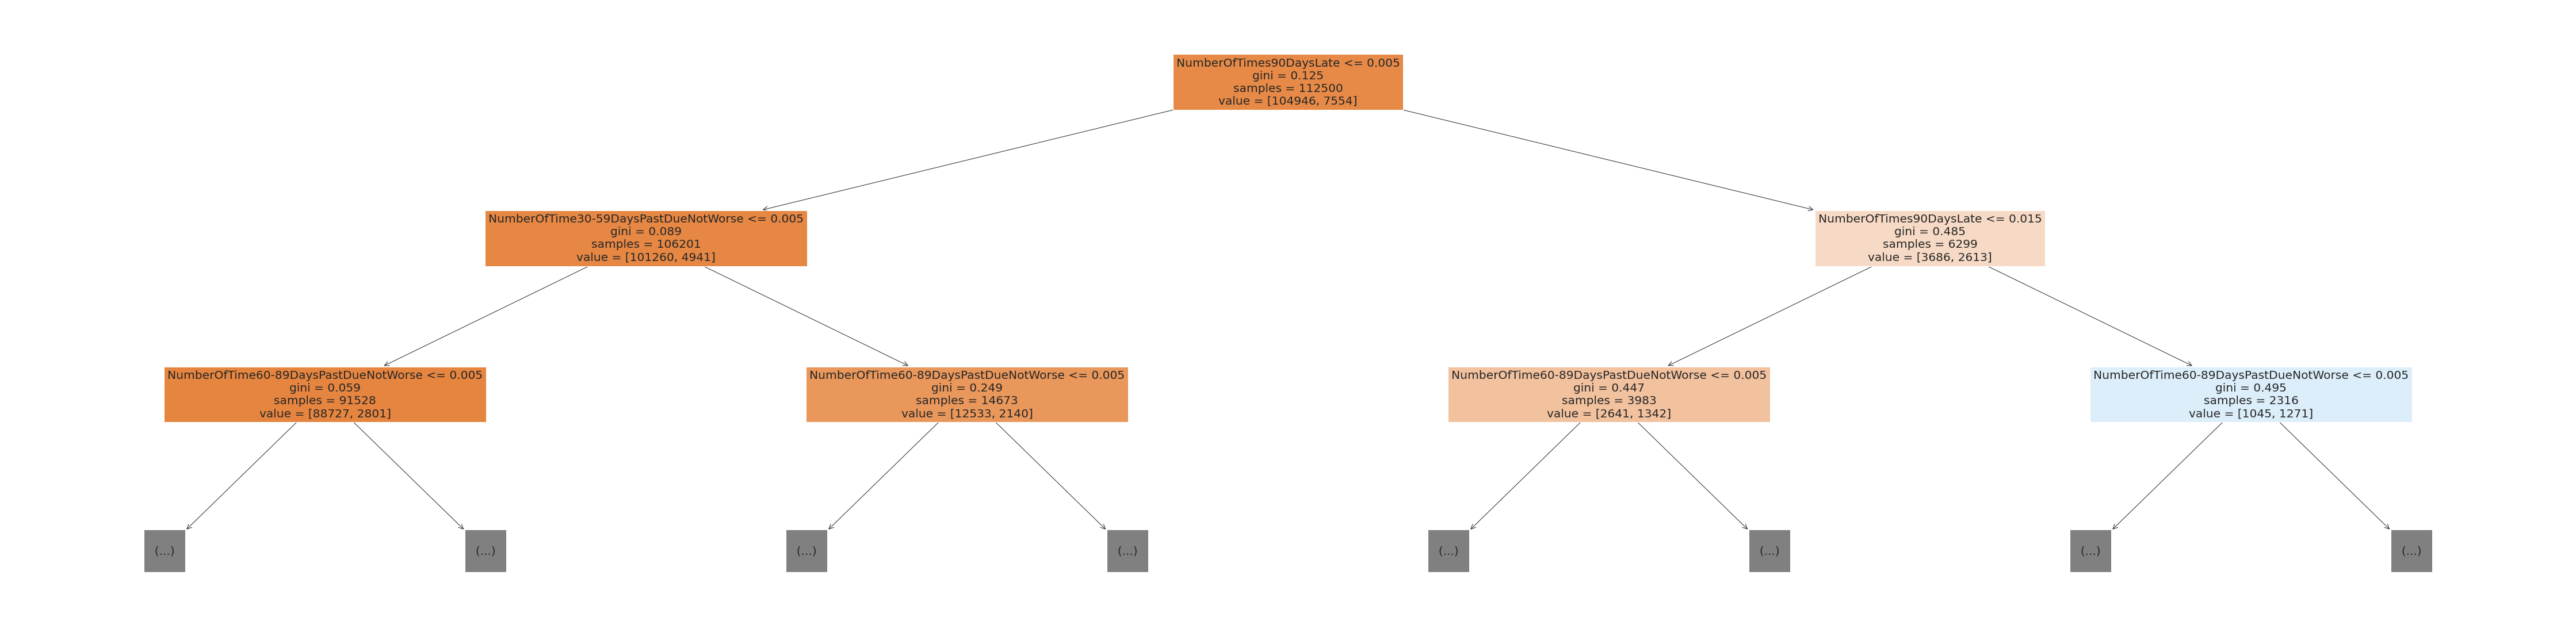

In [142]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, max_depth=2, filled=True);

In [130]:
model.tree_.max_depth

52

We can also display the tree as text, which can be easier to follow for deeper trees.

In [131]:
tree_text = export_text(model, max_depth=10, feature_names=list(X_train.columns))
print(tree_text[:5000])

|--- NumberOfTimes90DaysLate <= 0.01
|   |--- NumberOfTime30-59DaysPastDueNotWorse <= 0.01
|   |   |--- NumberOfTime60-89DaysPastDueNotWorse <= 0.01
|   |   |   |--- age <= 0.49
|   |   |   |   |--- NumberOfOpenCreditLinesAndLoans <= 0.03
|   |   |   |   |   |--- RevolvingUtilizationOfUnsecuredLines <= 0.00
|   |   |   |   |   |   |--- DebtRatio <= 0.00
|   |   |   |   |   |   |   |--- DebtRatio <= 0.00
|   |   |   |   |   |   |   |   |--- MonthlyIncome <= 0.00
|   |   |   |   |   |   |   |   |   |--- MonthlyIncome <= 0.00
|   |   |   |   |   |   |   |   |   |   |--- age <= 0.43
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 8
|   |   |   |   |   |   |   |   |   |   |--- age >  0.43
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- MonthlyIncome >  0.00
|   |   |   |   |   |   |   |   |   |   |--- age <= 0.38
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |

When we made predictions on the train data the machine is using the same data we fed it to train.

### Feature Importance

Based on the gini index computations, a decision tree assigns an "importance" value to each feature. These values can be used to interpret the results given by a decision tree.

In [132]:
model.feature_importances_

array([0.15322392, 0.13273425, 0.04655682, 0.13090737, 0.20297848,
       0.09814951, 0.12801856, 0.03324418, 0.02731924, 0.04686767])

Let's turn this into a dataframe and visualize the most important features.

In [133]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [134]:
importance_df.head(10)

,feature,importance
4,MonthlyIncome,0.202978
0,RevolvingUtilizationOfUnsecuredLines,0.153224
1,age,0.132734
3,DebtRatio,0.130907
6,NumberOfTimes90DaysLate,0.128019
5,NumberOfOpenCreditLinesAndLoans,0.098150
9,NumberOfDependents,0.046868
2,NumberOfTime30-59DaysPastDueNotWorse,0.046557
7,NumberRealEstateLoansOrLines,0.033244
8,NumberOfTime60-89DaysPastDueNotWorse,0.027319


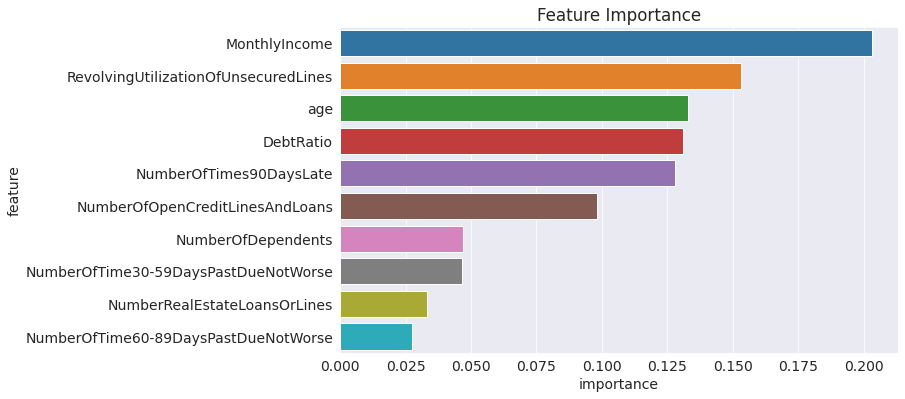

In [135]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

## Hyperparameter Tuning and Overfitting

As we saw in the previous section, our decision tree classifier memorized all training examples, leading to a 100% training accuracy, while the validation accuracy was only marginally better than a dumb baseline model. This phenomenon is called overfitting, and in this section, we'll look at some strategies for reducing overfitting. The process of reducing overfitting is known as _regularlization_.


The `DecisionTreeClassifier` accepts several arguments, some of which can be modified to reduce overfitting.

These arguments are called hyperparameters because they must be configured manually (as opposed to the parameters within the model which are _learned_ from the data. We'll explore a couple of hyperparameters:

- `max_depth`
- `max_leaf_nodes`

### `max_depth`

By reducing the maximum depth of the decision tree, we can prevent the tree from memorizing all training examples, which may lead to better generalization

In [136]:
model = DecisionTreeClassifier(max_depth=3, random_state=42)

In [137]:
model.fit(X_train, train_targets)

DecisionTreeClassifier(max_depth=3, random_state=42)

We can compute the accuracy of the model on the training and validation sets using `model.score`

In [138]:
model.score(X_train, train_targets)

0.9351644444444445

In [139]:
model.score(X_val, val_targets)

0.9361866666666666

Great, while the training accuracy of the model has gone down, the validation accuracy of the model has increased significantly.

In [140]:
model.classes_

array([0, 1])

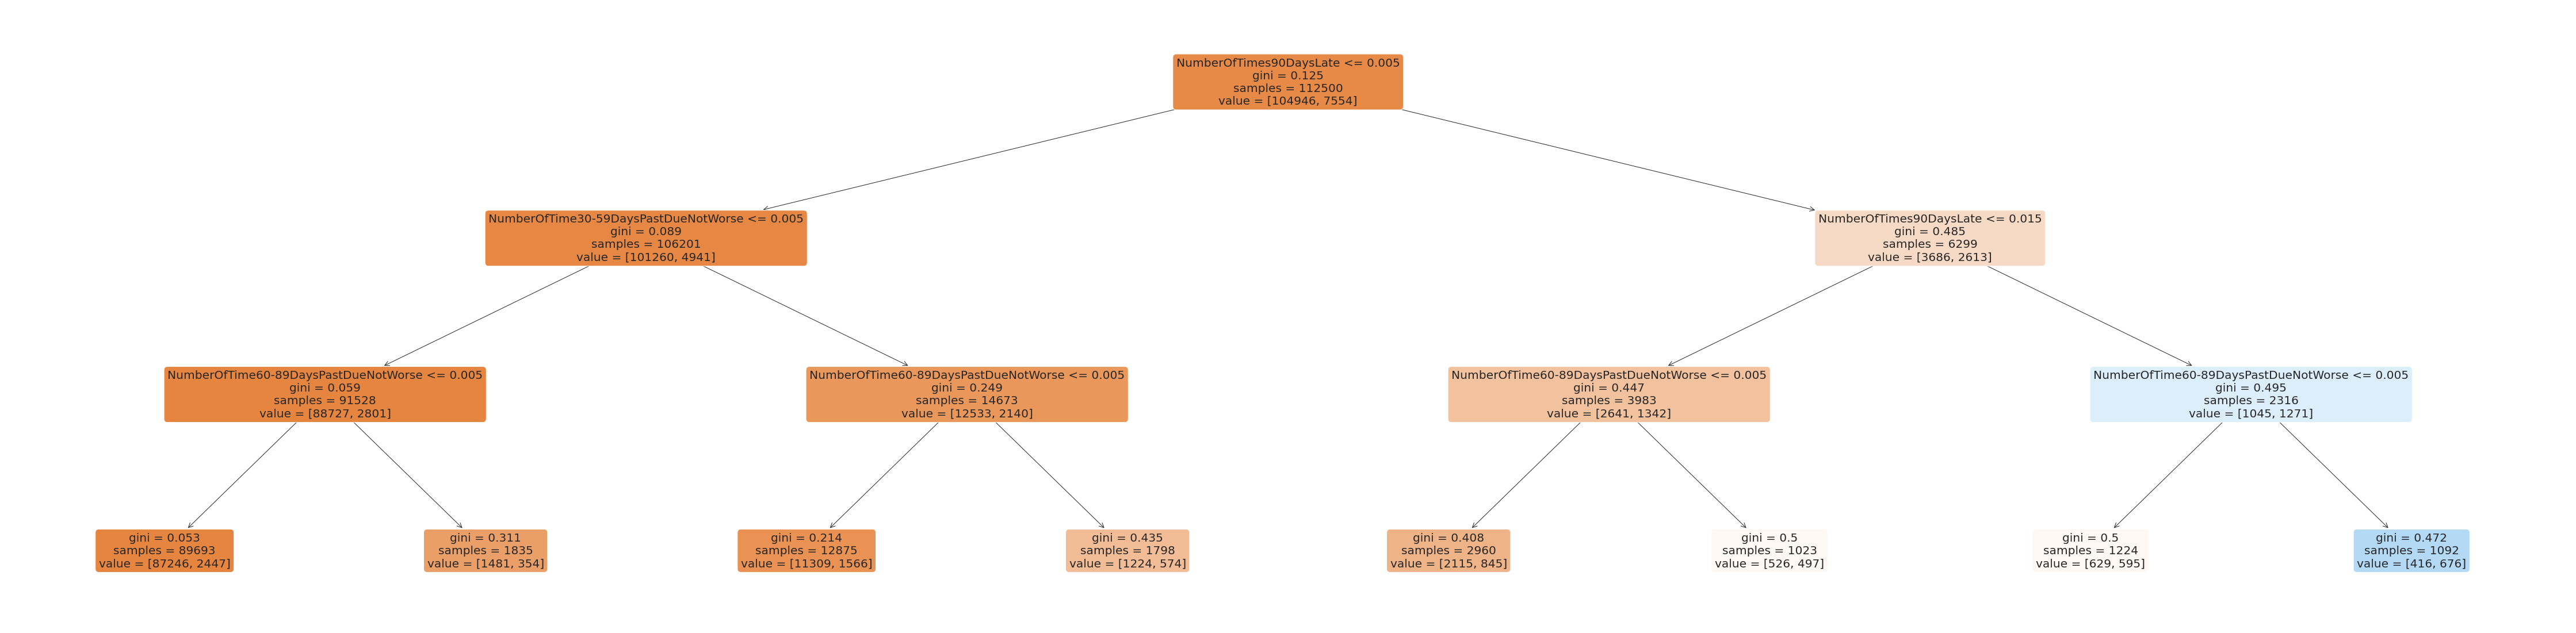

In [145]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, filled=True, rounded=True);

In [146]:
print(export_text(model, feature_names=list(X_train.columns)))

|--- NumberOfTimes90DaysLate <= 0.01
|   |--- NumberOfTime30-59DaysPastDueNotWorse <= 0.01
|   |   |--- NumberOfTime60-89DaysPastDueNotWorse <= 0.01
|   |   |   |--- class: 0
|   |   |--- NumberOfTime60-89DaysPastDueNotWorse >  0.01
|   |   |   |--- class: 0
|   |--- NumberOfTime30-59DaysPastDueNotWorse >  0.01
|   |   |--- NumberOfTime60-89DaysPastDueNotWorse <= 0.01
|   |   |   |--- class: 0
|   |   |--- NumberOfTime60-89DaysPastDueNotWorse >  0.01
|   |   |   |--- class: 0
|--- NumberOfTimes90DaysLate >  0.01
|   |--- NumberOfTimes90DaysLate <= 0.02
|   |   |--- NumberOfTime60-89DaysPastDueNotWorse <= 0.01
|   |   |   |--- class: 0
|   |   |--- NumberOfTime60-89DaysPastDueNotWorse >  0.01
|   |   |   |--- class: 0
|   |--- NumberOfTimes90DaysLate >  0.02
|   |   |--- NumberOfTime60-89DaysPastDueNotWorse <= 0.01
|   |   |   |--- class: 0
|   |   |--- NumberOfTime60-89DaysPastDueNotWorse >  0.01
|   |   |   |--- class: 1



Let's experiment with different depths using a helper function.

In [147]:
def max_depth_error(md):
    model = DecisionTreeClassifier(max_depth=md, random_state=42)
    model.fit(X_train, train_targets)
    train_acc = 1 - model.score(X_train, train_targets)
    val_acc = 1 - model.score(X_val, val_targets)
    return {'Max Depth': md, 'Training Error': train_acc, 'Validation Error': val_acc}

In [148]:
%%time
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1, 21)])

CPU times: user 12.8 s, sys: 0 ns, total: 12.8 s
Wall time: 12.8 s


In [149]:
errors_df

,Max Depth,Training Error,Validation Error
0,1,0.067147,0.065920
1,2,0.065138,0.063440
2,3,0.064836,0.063813
3,4,0.063698,0.063413
4,5,0.062720,0.064267
5,6,0.062089,0.063733
6,7,0.061316,0.063573
7,8,0.059742,0.064240
8,9,0.058151,0.064373
9,10,0.055600,0.065920


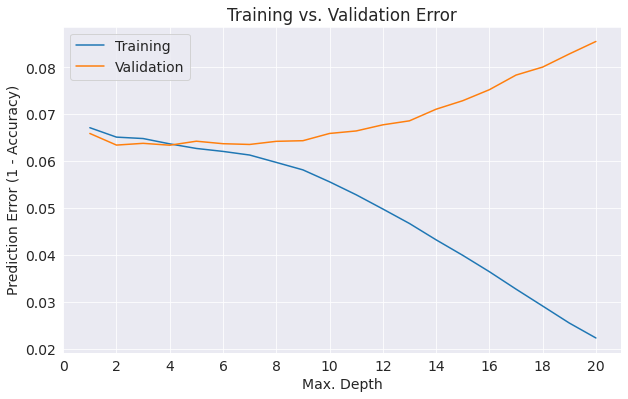

In [150]:
plt.figure()
plt.plot(errors_df['Max Depth'], errors_df['Training Error'])
plt.plot(errors_df['Max Depth'], errors_df['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xticks(range(0,21, 2))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])

You'll often need to tune hyperparameters carefully to find the optimal fit. In the above case, it appears that a maximum depth of 2 results in the lowest validation error.

In [151]:
model = DecisionTreeClassifier(max_depth=2, random_state=42).fit(X_train, train_targets)
model.score(X_val, val_targets)

0.93656

### `max_leaf_nodes`

Another way to control the size of complexity of a decision tree is to limit the number of leaf nodes. This allows branches of the tree to have varying depths. 

In [152]:
model = DecisionTreeClassifier(max_leaf_nodes=128, random_state=42)

In [153]:
model.fit(X_train, train_targets)

DecisionTreeClassifier(max_leaf_nodes=128, random_state=42)

In [154]:
model.score(X_train, train_targets)

0.9398844444444444

In [155]:
model.score(X_val, val_targets)

0.93648

In [156]:
model.tree_.max_depth

13

Notice that the model was able to achieve a greater depth of 12 for certain paths while keeping other paths shorter.

In [157]:
model_text = export_text(model, feature_names=list(X_train.columns))
print(model_text[:3000])

|--- NumberOfTimes90DaysLate <= 0.01
|   |--- NumberOfTime30-59DaysPastDueNotWorse <= 0.01
|   |   |--- NumberOfTime60-89DaysPastDueNotWorse <= 0.01
|   |   |   |--- age <= 0.49
|   |   |   |   |--- NumberOfOpenCreditLinesAndLoans <= 0.03
|   |   |   |   |   |--- RevolvingUtilizationOfUnsecuredLines <= 0.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- RevolvingUtilizationOfUnsecuredLines >  0.00
|   |   |   |   |   |   |--- age <= 0.24
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- age >  0.24
|   |   |   |   |   |   |   |--- RevolvingUtilizationOfUnsecuredLines <= 0.00
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- RevolvingUtilizationOfUnsecuredLines >  0.00
|   |   |   |   |   |   |   |   |--- age <= 0.32
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- age >  0.32
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- NumberOfOpenCreditLinesAndLoans >  0.0

In [158]:
def max_leaf_nodes_error(mln):
    model = DecisionTreeClassifier(max_leaf_nodes=mln, random_state=42)
    model.fit(X_train, train_targets)
    train_acc = 1 - model.score(X_train, train_targets)
    val_acc = 1 - model.score(X_val, val_targets)
    return {'Max Leaf Node': mln, 'Training Error': train_acc, 'Validation Error': val_acc}

In [159]:
%%time
errors_df1 = pd.DataFrame([max_leaf_nodes_error(mln) for mln in range(80, 180)])

CPU times: user 53.4 s, sys: 0 ns, total: 53.4 s
Wall time: 53.3 s


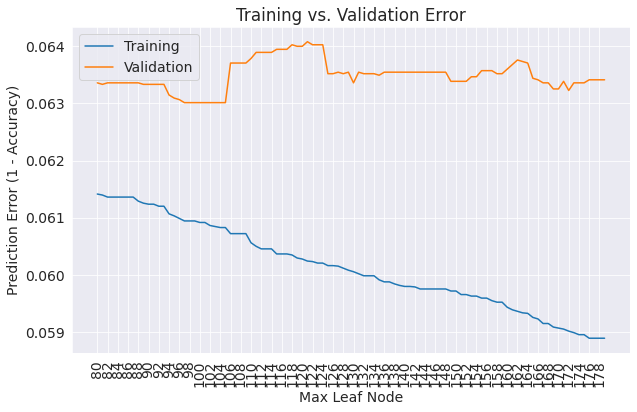

In [160]:
plt.figure()
plt.plot(errors_df1['Max Leaf Node'], errors_df1['Training Error'])
plt.plot(errors_df1['Max Leaf Node'], errors_df1['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xticks(range(80,180, 2), rotation=90)
plt.xlabel('Max Leaf Node')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])

In [161]:
model = DecisionTreeClassifier(max_depth=2, max_leaf_nodes=106, random_state=42)
model.fit(X_train, train_targets)

DecisionTreeClassifier(max_depth=2, max_leaf_nodes=106, random_state=42)

In [162]:
model.score(X_train, train_targets)

0.9348622222222223

In [163]:
model.score(X_val, val_targets)

0.93656

In [164]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=2, max_leaf_nodes=106, random_state=42)
model.fit(X_train, train_targets)
print('Train Accuracy:',model.score(X_train, train_targets))
print('Test Accuracy:',model.score(X_val, val_targets))

Train Accuracy: 0.9348622222222223
Test Accuracy: 0.93656


In [165]:
model = DecisionTreeClassifier(max_depth=2, max_leaf_nodes=106, random_state=42, splitter='random')
model.fit(X_train, train_targets)
print('Train Accuracy:',model.score(X_train, train_targets))
print('Test Accuracy:',model.score(X_val, val_targets))

Train Accuracy: 0.9331911111111111
Test Accuracy: 0.9341333333333334


In [166]:
model = DecisionTreeClassifier(max_depth=2, max_leaf_nodes=106, random_state=42)
path = model.cost_complexity_pruning_path(X_train, train_targets)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

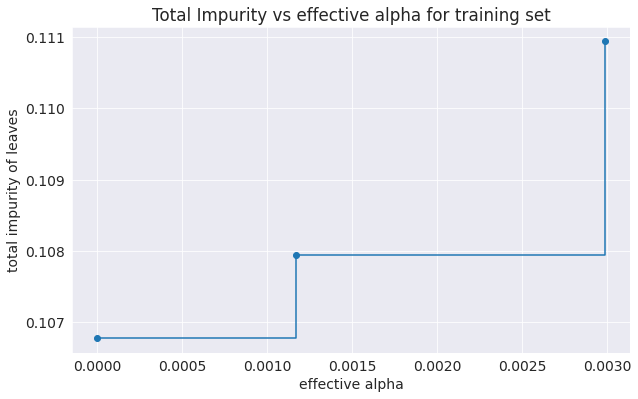

In [167]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [168]:
clfs = []

for ccp_alpha in ccp_alphas:
    model = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    model.fit(X_train, train_targets)
    clfs.append(model)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.014339536816714266


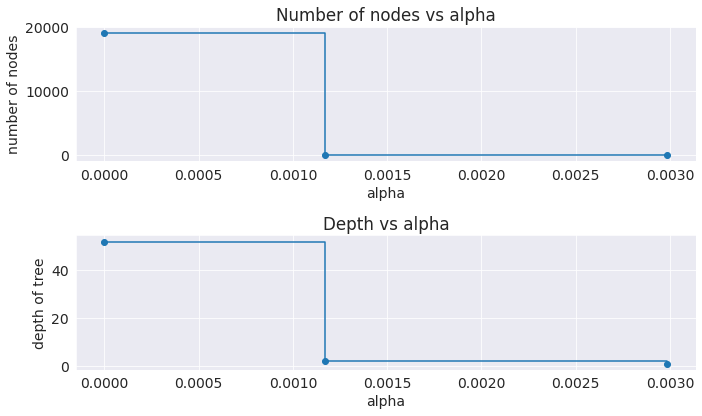

In [169]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [model.tree_.node_count for model in clfs]
depth = [model.tree_.max_depth for model in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

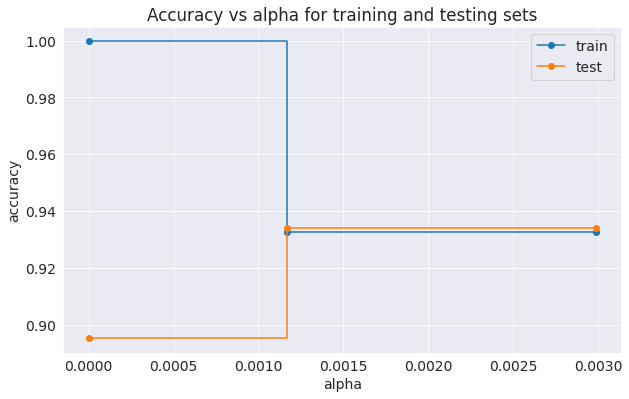

In [170]:
train_scores = [model.score(X_train, train_targets) for model in clfs]
test_scores = [model.score(X_val, val_targets) for model in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [207]:
model = DecisionTreeClassifier(random_state=42, ccp_alpha=0.0011)
model.fit(X_train, train_targets)
print('Train Accuracy:',model.score(X_train, train_targets))
print('Test Accuracy:',model.score(X_val, val_targets))

Train Accuracy: 0.9348622222222223
Test Accuracy: 0.93656


In [202]:
model = DecisionTreeClassifier(random_state=42,max_depth=2, max_leaf_nodes=106, ccp_alpha=0.0011)
model.fit(X_train, train_targets)
print('Train Accuracy:',model.score(X_train, train_targets))
print('Test Accuracy:',model.score(X_val, val_targets))

Train Accuracy: 0.9348622222222223
Test Accuracy: 0.93656


## Training a Random Forest

In [172]:
from sklearn.ensemble import RandomForestClassifier

In [173]:
model = RandomForestClassifier(n_jobs=-1, random_state=42)

`n_jobs` allows the random forest to use mutiple parallel workers to train decision trees, and `random_state=42` ensures that the we get the same results for each execution.

In [174]:
%%time
model.fit(X_train, train_targets)

CPU times: user 32.2 s, sys: 76.4 ms, total: 32.2 s
Wall time: 8.57 s


RandomForestClassifier(n_jobs=-1, random_state=42)

In [175]:
model.score(X_train, train_targets)

0.9988088888888889

In [176]:
model.score(X_val, val_targets)

0.9357866666666667

In [177]:
train_probs = model.predict_proba(X_train)
train_probs

array([[0.99770543, 0.00229457],
       [0.9980973 , 0.0019027 ],
       [0.8       , 0.2       ],
       ...,
       [0.39158965, 0.60841035],
       [0.9983671 , 0.0016329 ],
       [0.97573337, 0.02426663]])

We can can access individual decision trees using `model.estimators_`

In [178]:
model.estimators_[0]

DecisionTreeClassifier(max_features='auto', random_state=1608637542)

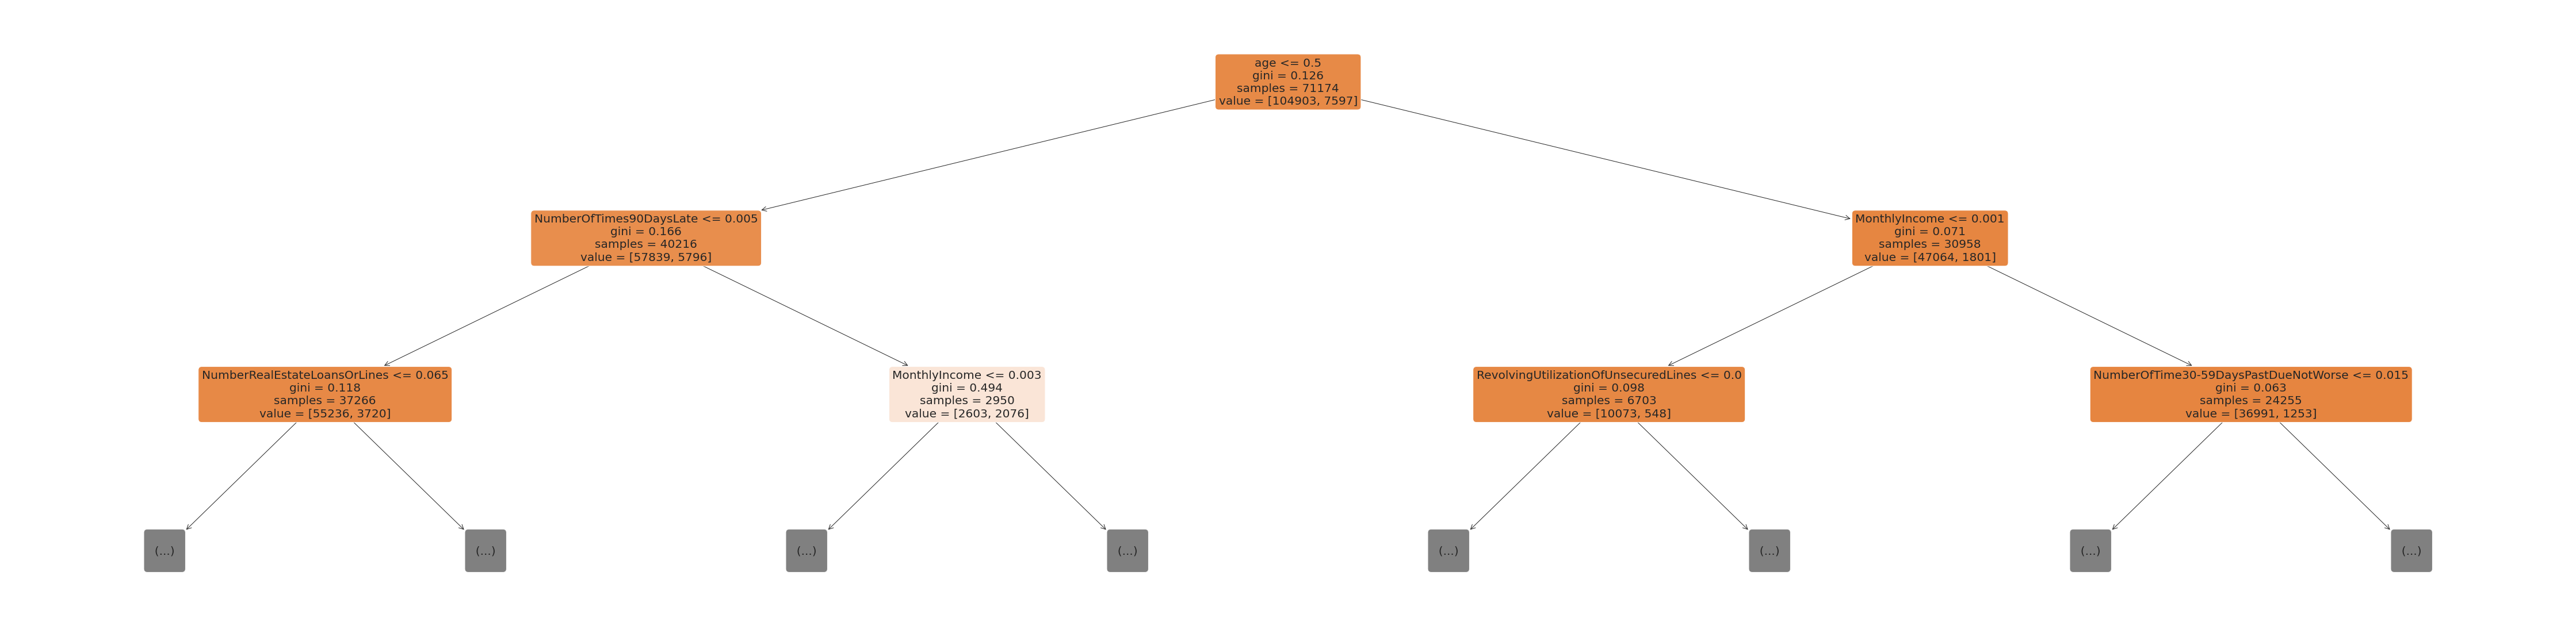

In [180]:
plt.figure(figsize=(80,20))
plot_tree(model.estimators_[0], max_depth=2, feature_names=X_train.columns, filled=True, rounded=True);

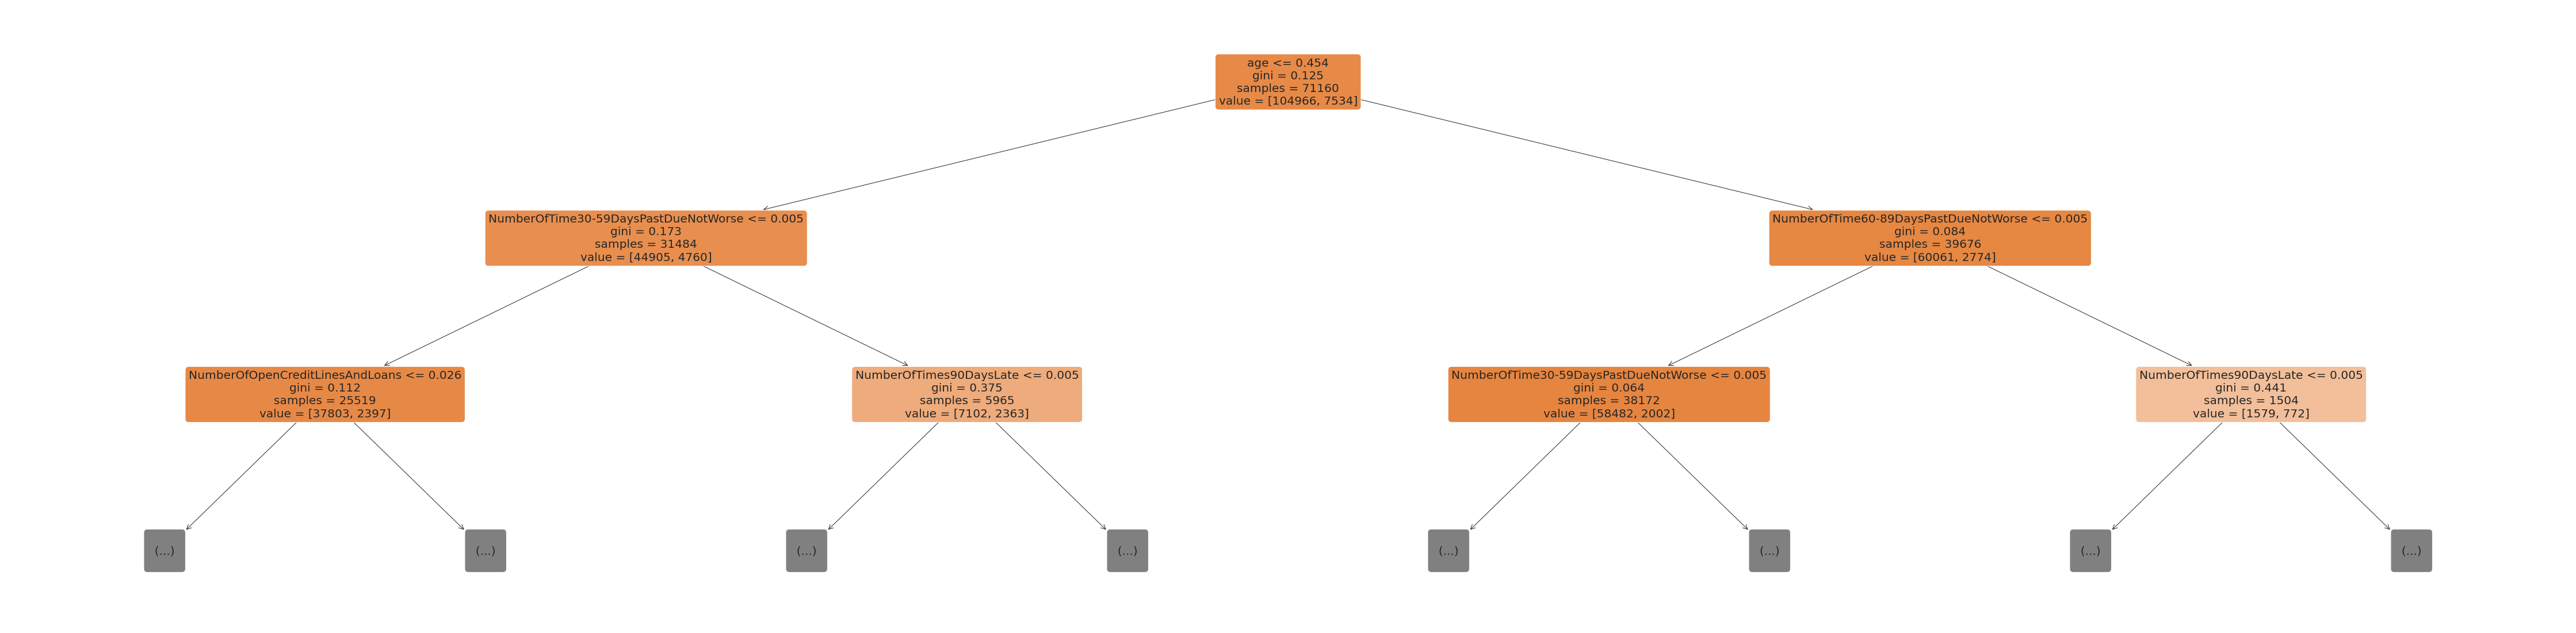

In [181]:
plt.figure(figsize=(80,20))
plot_tree(model.estimators_[20], max_depth=2, feature_names=X_train.columns, filled=True, rounded=True);

In [182]:
len(model.estimators_)

100

In [183]:
def estimator_acc(i):
    model.estimators_[i].fit(X_train, train_targets)
    return model.estimators_[i].score(X_val, val_targets)

In [184]:
accuracy=[]
for i in range(0,100):
    accuracy.append(estimator_acc(i))

In [185]:
max(accuracy)

0.91152

Observe that the max accuracy of individual tree `91.152%` which very less than the accuracy of `93.57%` .

Just like decision tree, random forests also assign an "importance" to each feature, by combining the importance values from individual trees.

In [186]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [187]:
importance_df.head(10)

,feature,importance
4,MonthlyIncome,0.173835
0,RevolvingUtilizationOfUnsecuredLines,0.168425
1,age,0.137438
3,DebtRatio,0.133285
6,NumberOfTimes90DaysLate,0.102340
5,NumberOfOpenCreditLinesAndLoans,0.096910
2,NumberOfTime30-59DaysPastDueNotWorse,0.056632
8,NumberOfTime60-89DaysPastDueNotWorse,0.049651
9,NumberOfDependents,0.046315
7,NumberRealEstateLoansOrLines,0.035169


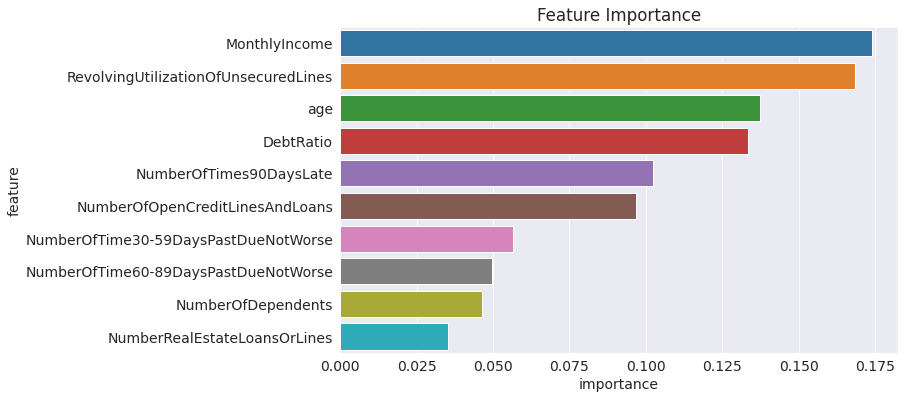

In [188]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

Notice that the distribution is a lot less skewed than that for a single decision tree.

## Hyperparameter Tuning with Random Forests

Just like decision trees, random forests also have several hyperparameters. In fact many of these hyperparameters are applied to the underlying decision trees. 

Let's study some the hyperparameters for random forests. You can learn more about them here: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Let's create a base model with which we can compare models with tuned hyperparameters.

In [189]:
base_model = RandomForestClassifier(random_state=42, n_jobs=-1).fit(X_train, train_targets)

In [190]:
base_train_acc = base_model.score(X_train, train_targets)
base_val_acc = base_model.score(X_val, val_targets)

In [191]:
base_accs = base_train_acc, base_val_acc
base_accs

(0.9988088888888889, 0.9357866666666667)

We can use this as a benchmark for hyperparmeter tuning.

### `n_estimators`

This argument controls the number of decision trees in the random forest. The default value is 100. For larger datasets, it helps to have a greater number of estimators. As a general rule, try to have as few estimators as needed. 


**10 estimators**

In [192]:
model = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=10)

In [193]:
model.fit(X_train, train_targets)

RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=42)

In [194]:
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.9906222222222222, 0.9333066666666666)

In [195]:
base_accs

(0.9988088888888889, 0.9357866666666667)

**500 estimators**

In [196]:
model = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=500)
model.fit(X_train, train_targets)

RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)

In [197]:
model.score(X_train, train_targets)

0.9993066666666667

In [198]:
model.score(X_val, val_targets)

0.9357333333333333

In [199]:
base_accs

(0.9988088888888889, 0.9357866666666667)

In [201]:
%%time
def n_estimators_acc(i):
    model =  RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=i)
    model.fit(X_train, train_targets)
    train_acc = 1 - model.score(X_train, train_targets)
    val_acc = 1 - model.score(X_val, val_targets)
    return {'n_estimators_acc': i, 'Training Error': train_acc, 'Validation Error': val_acc}
n_estimators_df = pd.DataFrame([n_estimators_acc(i) for i in range(100, 1001, 100)])

In [ ]:
n_estimators_df.head()

Let's define a helper function `test_params` to make it easy to test hyperparameters.

In [107]:
def test_params(**params):
    model = RandomForestClassifier(random_state=42, n_jobs=-1, **params).fit(X_train, train_targets)
    return model.score(X_train, train_targets), model.score(X_val, val_targets)

Let's test a few values of `max_depth` and `max_leaf_nodes`.

In [108]:
test_params(max_depth=5)

(0.8197862367155615, 0.8240961058557251)

In [109]:
test_params(max_depth=26)

(0.9814826039519942, 0.8572340549010504)

In [ ]:
test_params(max_leaf_nodes=2**5)

In [ ]:
test_params(max_leaf_nodes=2**20)

In [110]:
base_accs # no max depth or max leaf nodes

(0.9999494888269285, 0.8566537055307295)

The optimal values of `max_depth` and `max_leaf_nodes` lies somewhere between 0 and unbounded.

> **EXERCISE**: Vary the value of `max_depth` and plot the graph between training error and validation error. What is the optimal value of `max_depth`? Do the same for `max_leaf_nodes`.

In [ ]:
def max_depth_error(md):
    model = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=md).fit(X_train, train_targets)
    train_acc = 1 - model.score(X_train, train_targets)
    val_acc = 1 - model.score(X_val, val_targets)
    return {'Max Depth': md, 'Training Error': train_acc, 'Validation Error': val_acc}
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1, 40)])
plt.figure()
plt.plot(errors_df['Max Depth'], errors_df['Training Error'])
plt.plot(errors_df['Max Depth'], errors_df['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xticks(range(0,21, 2))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])

In [ ]:
def max_leaf_nodes_error(mln):
    model = RandomForestClassifier(random_state=42, n_jobs=-1, max_leaf_nodes=mln).fit(X_train, train_targets)
    train_acc = 1 - model.score(X_train, train_targets)
    train_acc = 1 - model.score(X_train, train_targets)
    val_acc = 1 - model.score(X_val, val_targets)
    return {'Max Leaf Node': mln, 'Training Error': train_acc, 'Validation Error': val_acc}
errors_df1 = pd.DataFrame([max_leaf_nodes_error(mln) for mln in range(140, 240)])
plt.figure()
plt.plot(errors_df1['Max Leaf Node'], errors_df1['Training Error'])
plt.plot(errors_df1['Max Leaf Node'], errors_df1['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xticks(range(80,180, 2), rotation=90)
plt.xlabel('Max Leaf Node')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])

In [111]:
test_params(max_features='log2')

(0.9999595910615429, 0.8558992513493123)

In [112]:
test_params(max_features=3)

(0.9999494888269285, 0.8543323080494458)

In [113]:
test_params(max_features=6)

(0.9999595910615429, 0.8558992513493123)

In [114]:
base_accs

(0.9999494888269285, 0.8566537055307295)

> **EXERCISE**: Find the optimal values of `max_features` for this dataset.

Same method as above can be used for following Qs for finding optimal solutions.

### `min_samples_split` and `min_samples_leaf`

By default, the decision tree classifier tries to split every node that has 2 or more. You can increase the values of these arguments to change this behavior and reduce overfitting, especially for very large datasets.

In [115]:
test_params(min_samples_split=3, min_samples_leaf=2)

(0.9625005051117307, 0.8565956705936975)

In [116]:
test_params(min_samples_split=100, min_samples_leaf=60)

(0.8495676243585081, 0.8451047530613429)

In [117]:
base_accs

(0.9999494888269285, 0.8566537055307295)

> **EXERCISE**: Find the optimal values of `min_samples_split` and `min_samples_leaf`.

### `min_impurity_decrease`

This argument is used to control the threshold for splitting nodes. A node will be split if this split induces a decrease of the impurity (Gini index) greater than or equal to this value. It's default value is 0, and you can increase it to reduce overfitting.



In [118]:
test_params(min_impurity_decrease=1e-7)

(0.9996060128500425, 0.8561313910974406)

In [119]:
test_params(min_impurity_decrease=1e-2)

(0.774891906089627, 0.7882885497069235)

In [120]:
base_accs

(0.9999494888269285, 0.8566537055307295)

> **EXERCISE**: Find the optimal values of `min_impurity_decrease` for this dataset.

### `bootstrap`, `max_samples` 

By default, a random forest doesn't use the entire dataset for training each decision tree. Instead it applies a technique called bootstrapping. For each tree, rows from the dataset are picked one by one randomly, with replacement i.e. some rows may not show up at all, while some rows may show up multiple times.


<img src="https://i.imgur.com/W8UGaEA.png" width="640">

Bootstrapping helps the random forest generalize better, because each decision tree only sees a fraction of th training set, and some rows randomly get higher weightage than others.

In [121]:
test_params(bootstrap=False)

(0.9999797955307714, 0.8567697754047937)

In [122]:
base_accs

(0.9999494888269285, 0.8566537055307295)

When bootstrapping is enabled, you can also control the number or fraction of rows to be considered for each bootstrap using `max_samples`. This can further generalize the model.

<img src="https://i.imgur.com/rsdrL1W.png" width="640">

In [123]:
test_params(max_samples=0.9)

(0.9997676486038711, 0.8565376356566653)

In [124]:
base_accs

(0.9999494888269285, 0.8566537055307295)

Learn more about bootstrapping here: https://towardsdatascience.com/what-is-out-of-bag-oob-score-in-random-forest-a7fa23d710

### `class_weight`

In [125]:
model.classes_

array(['No', 'Yes'], dtype=object)

In [126]:
test_params(class_weight='balanced')

(0.9999595910615429, 0.8553769369160235)

In [127]:
test_params(class_weight={'No': 1, 'Yes': 2})

(0.9999595910615429, 0.8558412164122802)

In [128]:
base_accs

(0.9999494888269285, 0.8566537055307295)

> **EXERCISE**: Find the optimal value of `class_weight` for this dataset.

### Putting it together

Let's train a random forest with customized hyperparameters based on our learnings. Of course, different hyperpraams

In [209]:
model = RandomForestClassifier(n_jobs=-1, 
                               random_state=42, 
                               n_estimators=500,
                               max_features=2,
                               max_depth=106, 
                               class_weight={0: 1, 1: 1.5})

In [210]:
model.fit(X_train, train_targets)

RandomForestClassifier(class_weight={0: 1, 1: 1.5}, max_depth=106,
                       max_features=2, n_estimators=500, n_jobs=-1,
                       random_state=42)

In [211]:
model.score(X_train, train_targets), model.score(X_val, val_targets)

(0.9945866666666666, 0.9364533333333334)

In [132]:
base_accs

(0.9999494888269285, 0.8566537055307295)

Finally, let's also compute the accuracy of our model on the test set.

In [208]:
model.score(X_test, test_targets)

NameError: name 'X_test' is not defined

Notice that the test accuracy is lower

Let's save our work before continuing.

In [135]:
jovian.commit()

[jovian] Detected Colab notebook...



[jovian] Uploading colab notebook to Jovian...



Committed successfully! https://jovian.ai/aakashns/sklearn-decision-trees-random-forests


'https://jovian.ai/aakashns/sklearn-decision-trees-random-forests'

## Making Predictions on New Inputs

Let's define a helper function to make predictions on new inputs.

In [136]:
def predict_input(model, single_input):
    input_df = pd.DataFrame([single_input])
    input_df[numeric_cols] = imputer.transform(input_df[numeric_cols])
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
    X_input = input_df[numeric_cols + encoded_cols]
    pred = model.predict(X_input)[0]
    prob = model.predict_proba(X_input)[0][list(model.classes_).index(pred)]
    return pred, prob

In [137]:
new_input = {'Date': '2021-06-19',
             'Location': 'Launceston',
             'MinTemp': 23.2,
             'MaxTemp': 33.2,
             'Rainfall': 10.2,
             'Evaporation': 4.2,
             'Sunshine': np.nan,
             'WindGustDir': 'NNW',
             'WindGustSpeed': 52.0,
             'WindDir9am': 'NW',
             'WindDir3pm': 'NNE',
             'WindSpeed9am': 13.0,
             'WindSpeed3pm': 20.0,
             'Humidity9am': 89.0,
             'Humidity3pm': 58.0,
             'Pressure9am': 1004.8,
             'Pressure3pm': 1001.5,
             'Cloud9am': 8.0,
             'Cloud3pm': 5.0,
             'Temp9am': 25.7,
             'Temp3pm': 33.0,
             'RainToday': 'Yes'}

In [138]:
predict_input(model, new_input)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`



  self[col] = igetitem(value, i)


('Yes', 0.7608595348304203)

> **EXERCISE**: Try changing the values in `new_input` and observe how the predictions and probabilities change. Try different values of location, temperature, humidity, pressure etc. Try to get an _intuitive feel_ of which columns have the greatest effect on the result of the model.

In [139]:
raw_df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

## Saving and Loading Trained Models

We can save the parameters (weights and biases) of our trained model to disk, so that we needn't retrain the model from scratch each time we wish to use it. Along with the model, it's also important to save imputers, scalers, encoders and even column names. Anything that will be required while generating predictions using the model should be saved.

We can use the `joblib` module to save and load Python objects on the disk. 

In [140]:
import joblib

In [141]:
aussie_rain = {
    'model': model,
    'imputer': imputer,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}

In [142]:
joblib.dump(aussie_rain, 'aussie_rain.joblib')

['aussie_rain.joblib']

The object can be loaded back using `joblib.load`

In [ ]:
aussie_rain2 = joblib.load('aussie_rain.joblib')

In [ ]:
test_preds2 = aussie_rain2['model'].predict(X_test)
accuracy_score(test_targets, test_preds2)

Let's save our work before continuing.